In [1]:
import cv2

In [9]:
from img2table.document import Image
from PIL import Image as PILImage

img = Image(src="warpped.jpg")#specify image path

# Extract tables
extracted_tables = img.extract_tables()
print(extracted_tables)

[ExtractedTable(title=None, bbox=(289, 1318, 2014, 1803),shape=(5, 13)), ExtractedTable(title=None, bbox=(1584, 798, 1802, 1123),shape=(2, 1))]


PLACE THE PAPER PROPERLY!!!


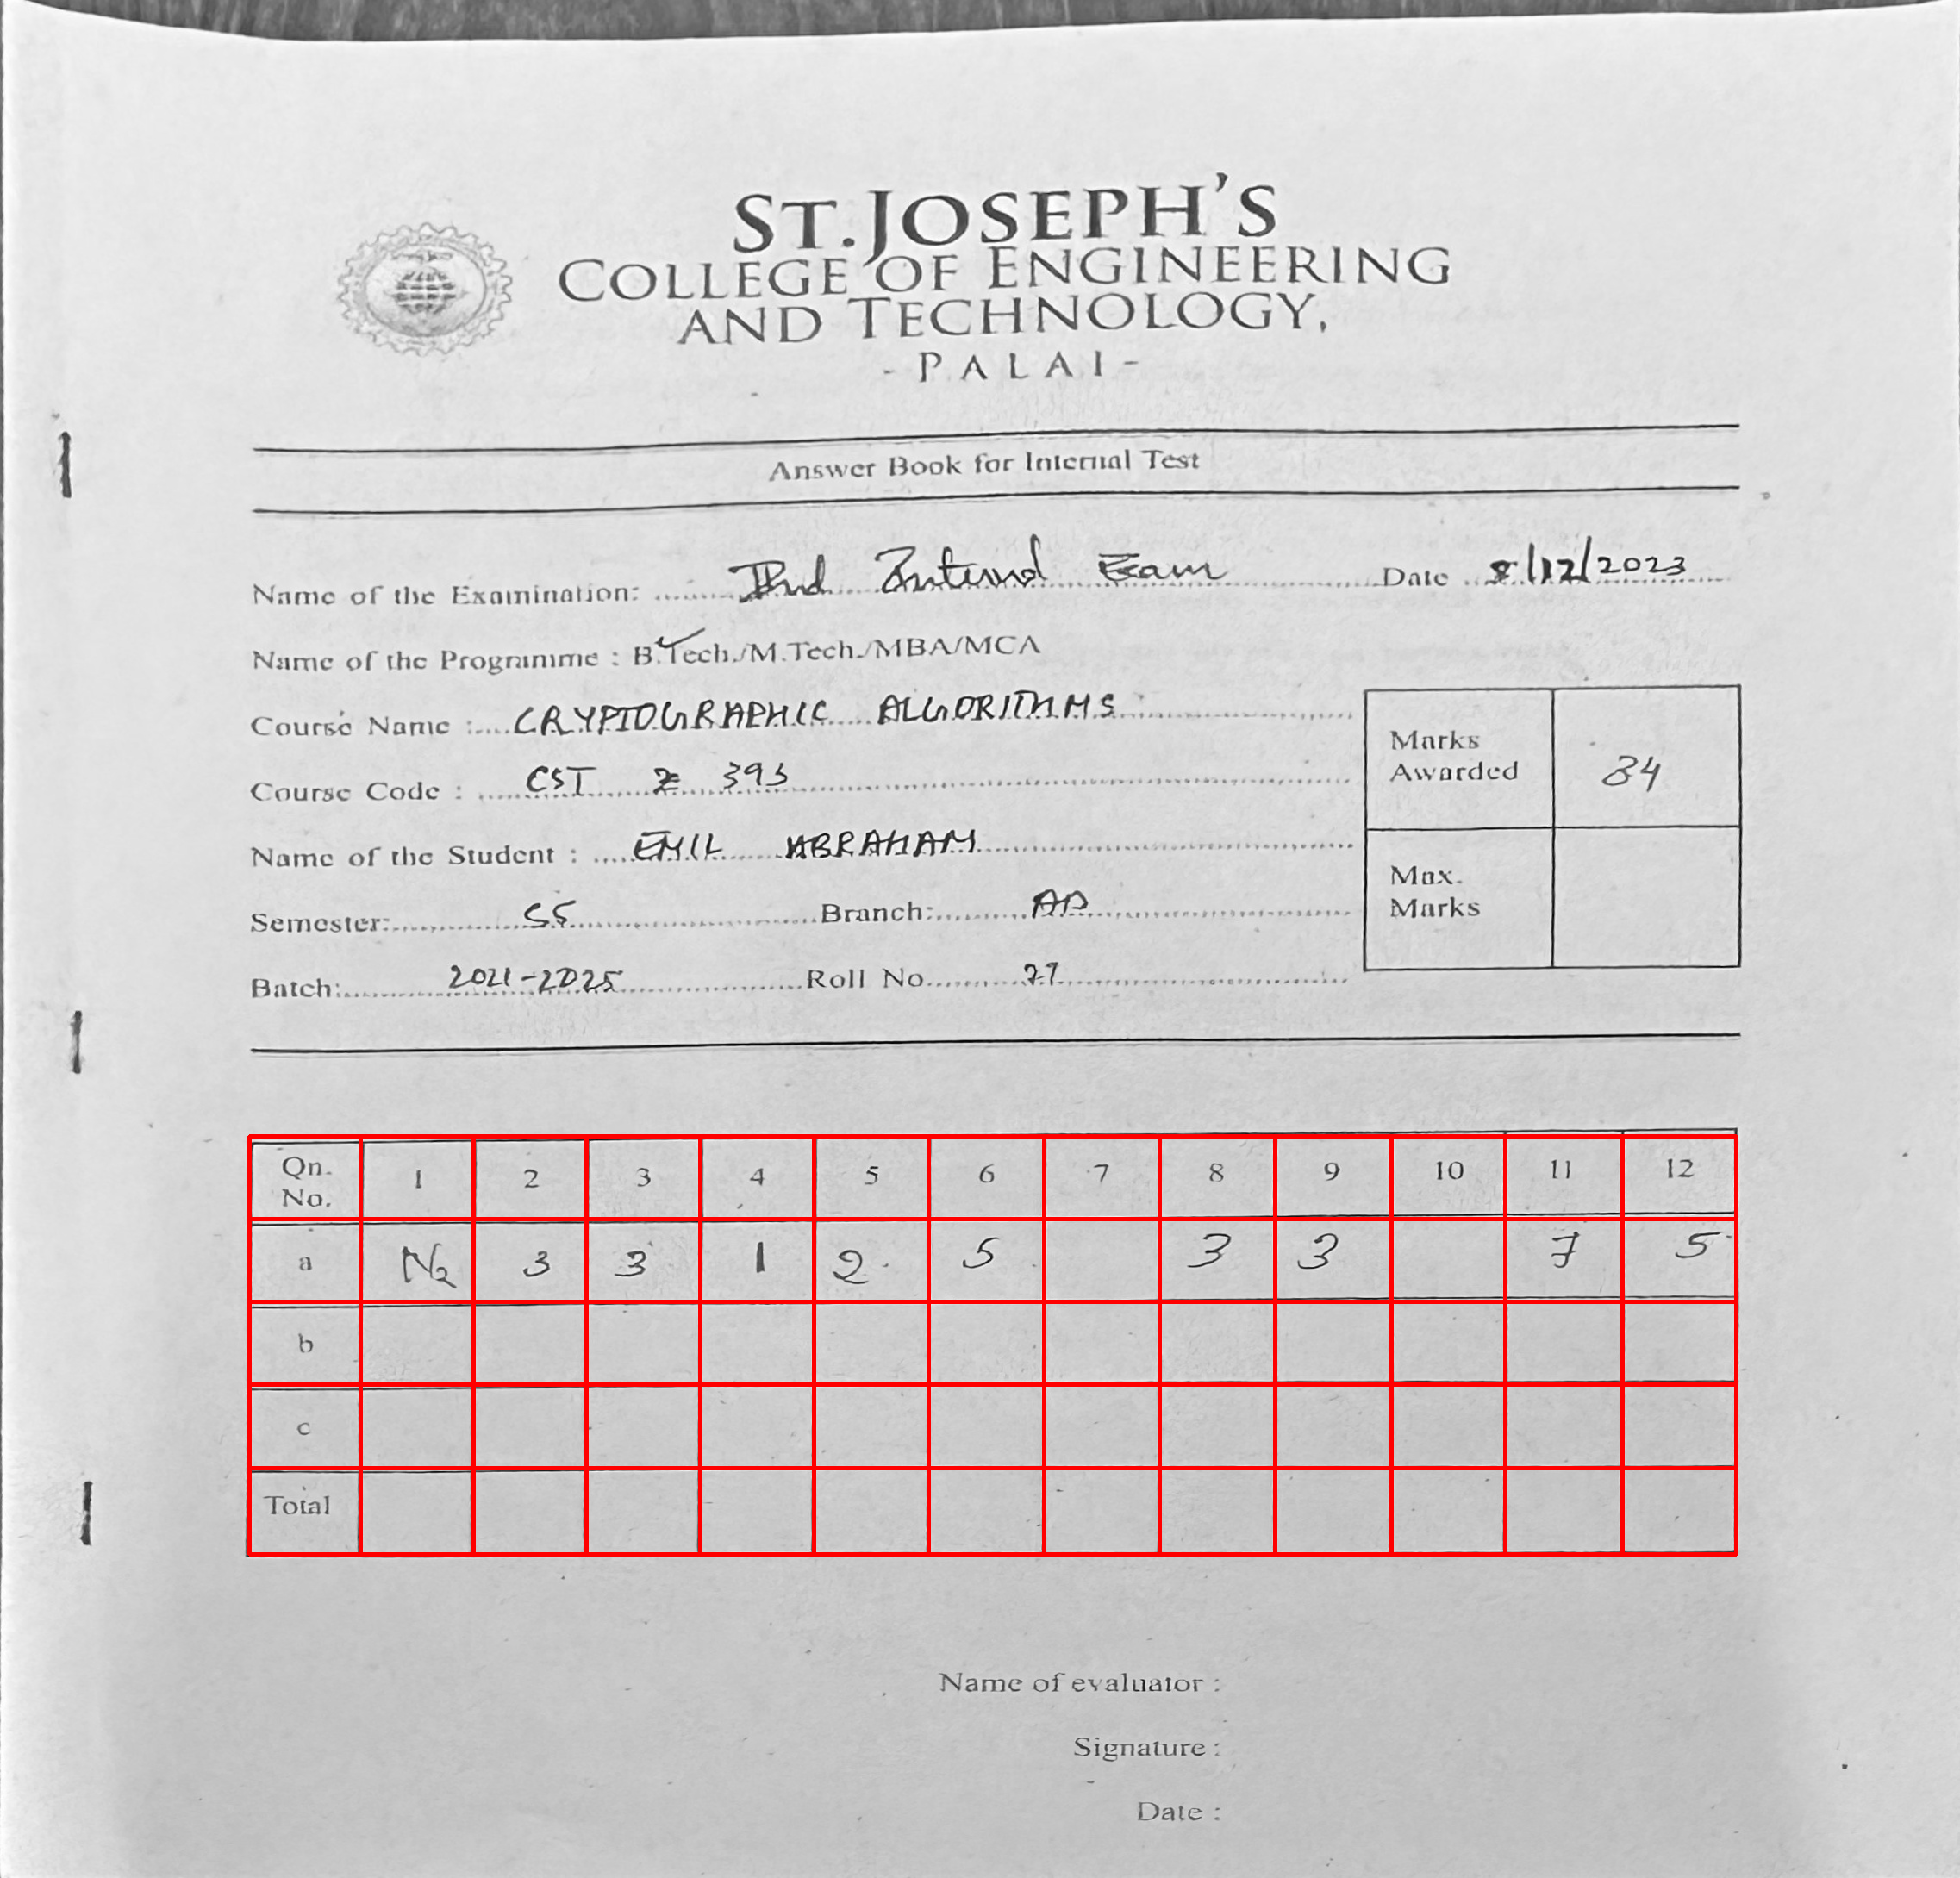

In [11]:
table_img = cv2.imread("warpped.jpg")
i = 1
cp_table = table_img.copy()

for table in extracted_tables:
    if(len(table.content) == 5):
        for row in table.content.values():
            for cell in row:
                cv2.rectangle(cp_table, (cell.bbox.x1, cell.bbox.y1), (cell.bbox.x2, cell.bbox.y2),(255, 0, 0), 3)
                sp_cell = table_img[cell.bbox.y1:cell.bbox.y2, cell.bbox.x1:cell.bbox.x2]
                cv2.imwrite(f'./Cell_cropped/Cell_{i}.jpg', sp_cell)
                i = i + 1
    else:
        print("PLACE THE PAPER PROPERLY!!!")
        break
            
PILImage.fromarray(cp_table)